<img height="150" src="https://i.postimg.cc/gjptBxF4/logo-gas-removebg-preview.png" width="350"/>

In [1]:
import os
from warnings import filterwarnings

import pandas as pd
from setuptools.command.rotate import rotate

filterwarnings('ignore')

path = os.path.join(os.getcwd(), 'data', "DADOS_ARTIGO_AMENDOIM.xlsx")
df = pd.read_excel(path,"Dados_finais")

df.drop(columns=["DC","Cultivar","Rep","Estadio",'DG',"DR","Qg","Qo", "Fotop","URMIN","NDH > 90%", "TMAX","URMAX","PS",'P-ETP','NAC',"ETR","EXC","ETp", "Rajada Máxima"], inplace=True);df

,Dia,TMIN,T2M,UR2M,PREC,W2M,NDJ,PAR,ARM,ALT,DEF,SDG
0,2023-11-23,22.0,24.6,81.6,0.8,2.17,327,8.155,24.900722,10.849172,0.000000,11.6
1,2023-11-24,19.5,24.4,79.2,7.0,3.02,328,9.580,27.730722,2.830000,0.000000,23.0
2,2023-11-25,17.0,23.8,68.6,0.0,2.56,329,11.430,23.991918,-3.738804,0.331196,33.8
3,2023-11-26,18.2,25.2,65.6,0.0,1.87,330,11.430,20.573366,-3.418552,0.901448,46.0
4,2023-11-27,20.2,25.2,71.4,0.0,2.09,331,8.970,17.641915,-2.931451,1.388549,58.2
...,...,...,...,...,...,...,...,...,...,...,...,...
10555,2024-04-26,19.6,26.1,60.0,0.0,1.39,117,8.615,1.503642,-0.171777,2.868223,1932.1
10556,2024-04-27,19.8,25.8,61.1,0.0,1.93,118,9.255,1.351880,-0.151762,2.838238,1944.9
10557,2024-04-28,19.8,26.1,59.0,0.0,1.51,119,9.115,1.214571,-0.137309,2.872691,1958.0
10558,2024-04-29,20.0,26.3,56.8,0.0,1.66,120,9.030,1.091208,-0.123363,2.886637,1971.3


In [2]:
dados = df.groupby("Dia").mean()

In [3]:
import numpy as np

dados['CD'] = np.arange(1, 161, 1)

In [4]:
dados

,TMIN,T2M,UR2M,PREC,W2M,NDJ,PAR,ARM,ALT,DEF,SDG,CD
Dia,,,,,,,,,,,,
2023-11-23,22.0,24.6,81.6,0.8,2.17,327.0,8.155,24.900722,10.849172,0.000000,11.6,1
2023-11-24,19.5,24.4,79.2,7.0,3.02,328.0,9.580,27.730722,2.830000,0.000000,23.0,2
2023-11-25,17.0,23.8,68.6,0.0,2.56,329.0,11.430,23.991918,-3.738804,0.331196,33.8,3
2023-11-26,18.2,25.2,65.6,0.0,1.87,330.0,11.430,20.573366,-3.418552,0.901448,46.0,4
2023-11-27,20.2,25.2,71.4,0.0,2.09,331.0,8.970,17.641915,-2.931451,1.388549,58.2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26,19.6,26.1,60.0,0.0,1.39,117.0,8.615,1.503642,-0.171777,2.868223,1932.1,156
2024-04-27,19.8,25.8,61.1,0.0,1.93,118.0,9.255,1.351880,-0.151762,2.838238,1944.9,157
2024-04-28,19.8,26.1,59.0,0.0,1.51,119.0,9.115,1.214571,-0.137309,2.872691,1958.0,158


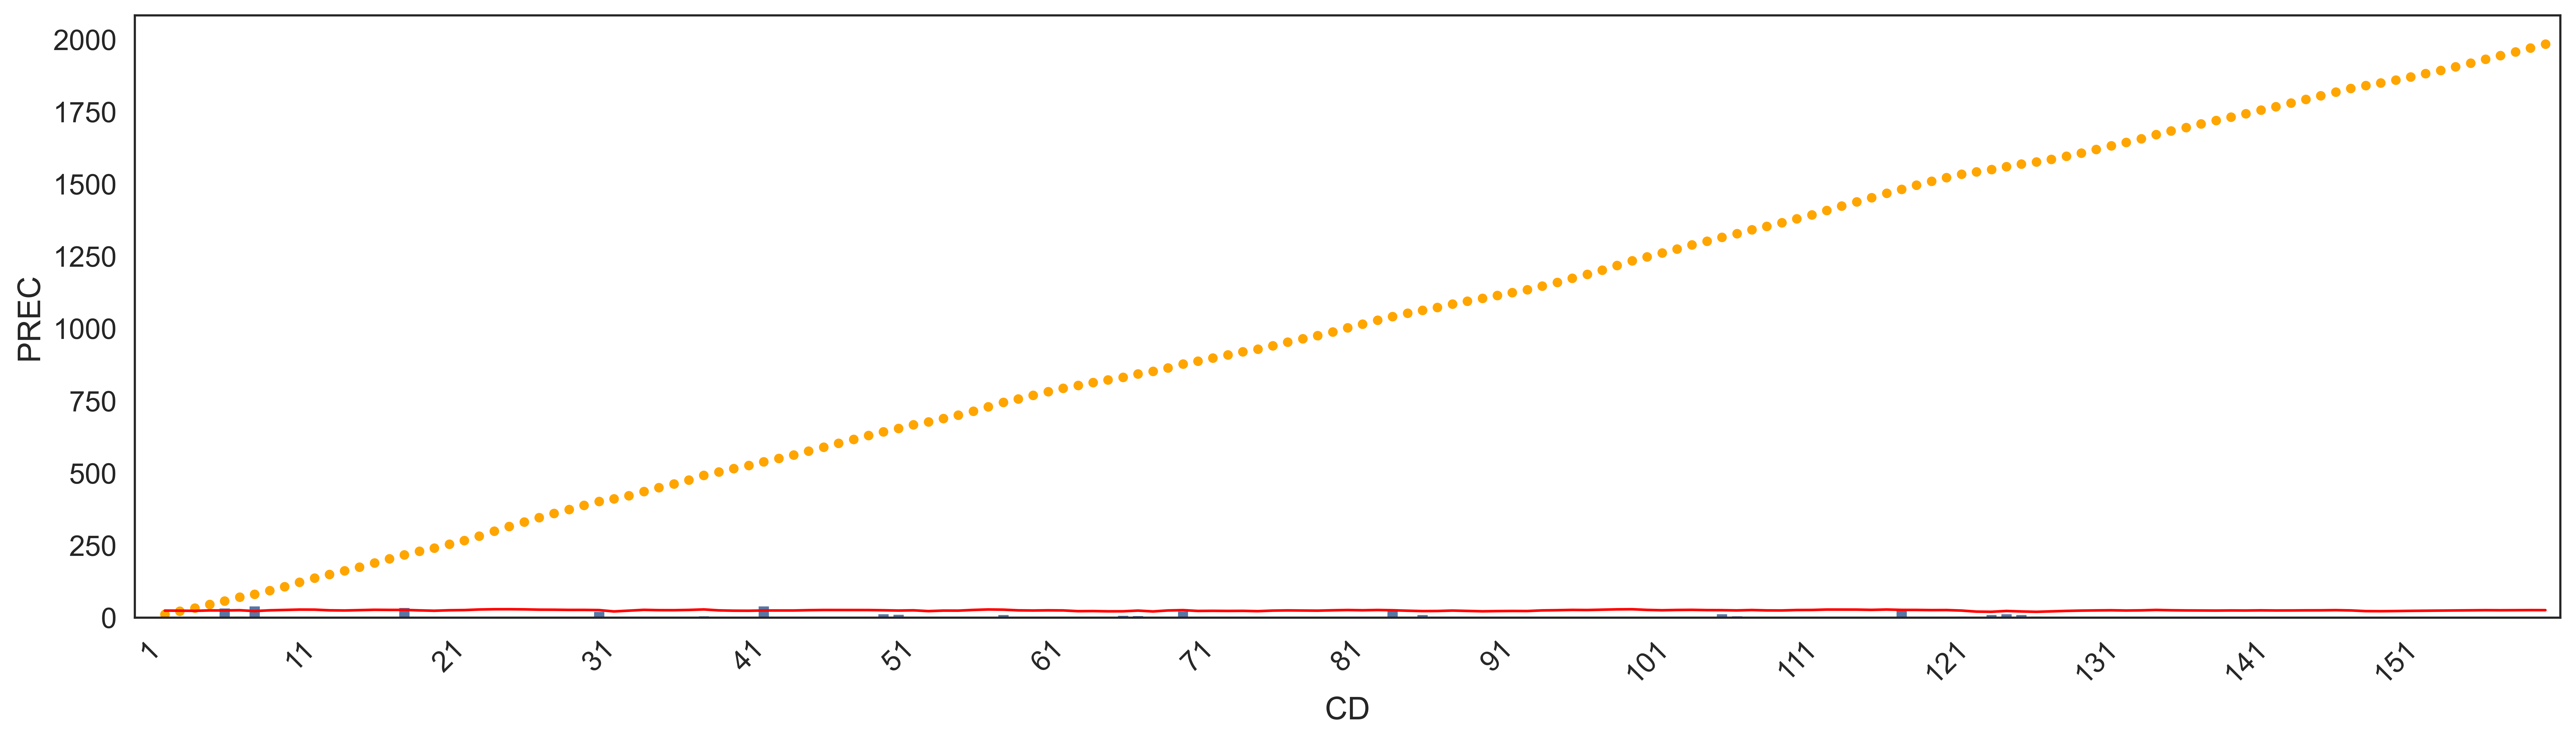

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", context="paper", font_scale=1.5)

plt.figure(figsize=(20,5), dpi=600)

sns.barplot(data=dados,  x="CD", y="PREC")
sns.lineplot(data=dados, x="CD", y="T2M", color="red")
sns.scatterplot(data=dados, x="CD", y="SDG", color="orange")

ticks = np.arange(0, 161, 10)
plt.xlim(-1, 161)
plt.xticks(ticks=ticks, rotation=45)

plt.show()

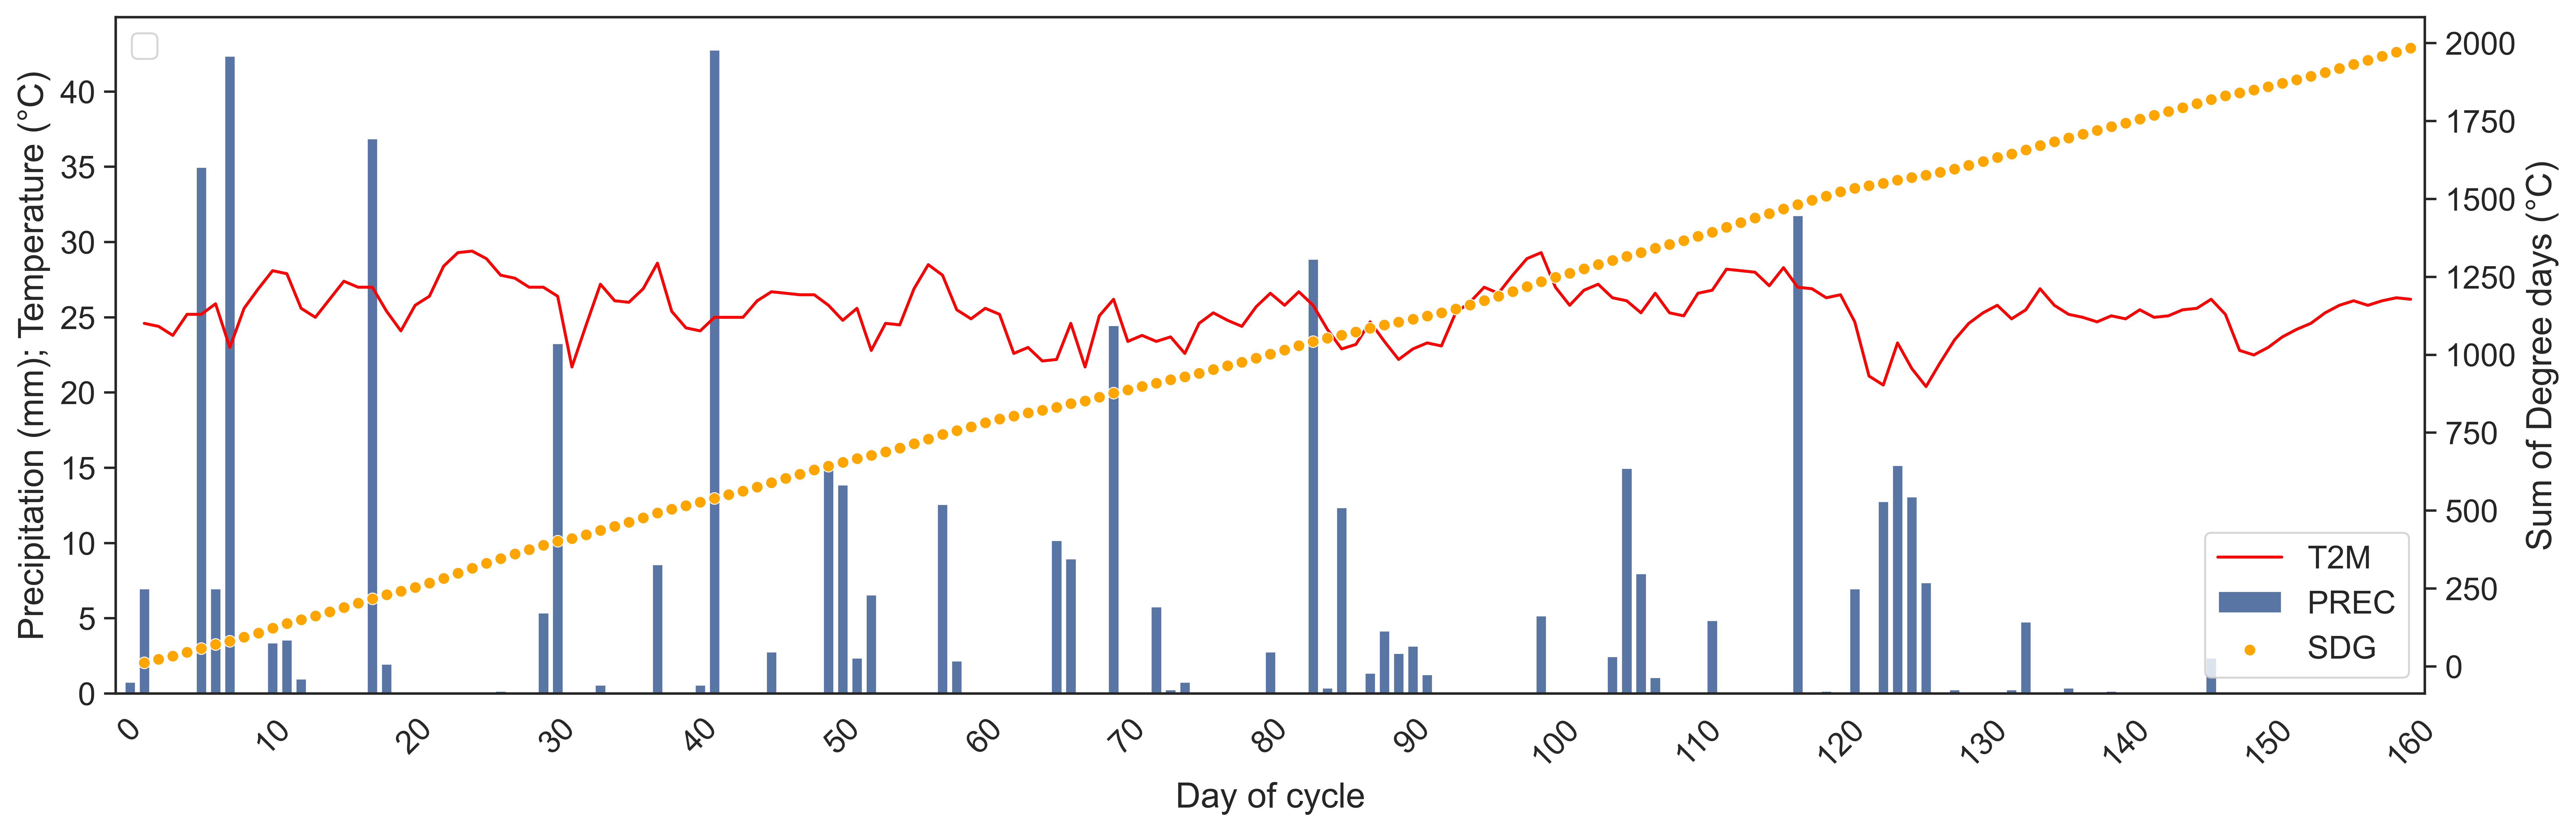

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="white", context="paper", font_scale=1.5)

fig, ax1 = plt.subplots(figsize=(15, 5), dpi=600)

# Primeiro eixo Y para barplot e lineplot
sns.barplot(data=dados, x="CD", y="PREC", ax=ax1, label="PREC")
sns.lineplot(data=dados, x="CD", y="T2M", color="red", ax=ax1, label="T2M")

# Segundo eixo Y para scatterplot
ax2 = ax1.twinx()
sns.scatterplot(data=dados, x="CD", y="SDG", color="orange", ax=ax2, label="SDG")
ax2.legend("")

# Configuração dos ticks do eixo X
ticks = np.arange(0, 161, 10)
ax1.set_xlim(-1, 161)
ax1.set_xticks(ticks)
ax1.set_xticklabels(ticks, rotation=45)

# Adicionando labels aos eixos
ax1.set_ylabel("Precipitation (mm); Temperature (°C)")
ax2.set_ylabel("Sum of Degree days (°C)")
ax1.set_xlabel("Day of cycle")

# Ajustando layout para evitar cortes de texto
fig.tight_layout()

# Adicionando legendas separadamente para cada eixo
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='lower right')

fig_path = os.path.join(os.getcwd(), "images", "Figure 1.jpg")
#plt.savefig(fig_path, dpi=600, bbox_inches="tight", pad_inches=0.1)

plt.show()